# COGS 118B - Final Project

# Names

- Sam Dimmock
- Vincent Gao
- Owen Guan
- Ryota Takemura


# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

In [2]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random
# from monte_carlo_control import OnePlayerMahjongGame
# from monte_carlo_try import MonteCarlo

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Abstract (130 words)
Is it possible to design an AI algorithm that behaves similar to human players ranging from beginning to master for the simple-styled Shanghai mahjong? The data used represents training data by simulations and measures the skill expression of our agent given a starting hand. Our environment is used to guide the AI algorithm how to behave as an agent with a goal to win but with differentiating skill levels. The performance level is measured by playing alone, against other players and an oracle agents to reach the intended state of play. Though the original standard for the AI algorithm was not met, the process of designing a purposeful mahjong environment, reward prediction algorithm, functionable agent, and monte carlo algorithm allowed for discoveries of efficiencies, and reasonable simplifications for runtime/feasibility.

# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 3 to 5 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

Mahjong is an iconic multiplayer imperfect information game that has been played for nearly 2 centuries around the world, originating in China in the mid-1800s<a name="lang"></a>[<sup>[1]</sup>](#langnote). One of the reasons it is so beloved by millions of players is because of the flexible rulesets, point system, complex strategies, and fun it brings to all players. However, it is a game involving very much stochasticity as each of the players try to find a winning set of 14 tiles. While there are certainly many mahjong AI algorithms like those used in online games such as Mahjong Soul and Microsoft’s Suphx, the goal is to create an optimized AI algorithm for Shanghai mahjong that is fair and behaves in a manner similar to humans.


One way to analyze training data is simply by using a trainer like those created by players such as Euophrys<a name="euophrys"></a>[<sup>[2]</sup>](#euophrysnote) to scrape actual gameplay from online records (such as Mahjong Soul’s database) for different levels of play; this helps for understanding different methods of playing mahjong as well as different rulesets (Mahjong Soul’s style is called jantama/riichi mahjong). On the other hand, when designing an optimal algorithm, it is important to look into Suphx and the way deep reinforcement learning is used to formulate the best strategy.<a name="li"></a>[<sup>[3]</sup>](#linote) 

The design approach was decided with techniques such as run-time policy adaptation, global reward prediction, and oracle guiding to reach the top 0.1% in terms of ranking on the Tenhou gaming service.<a name="li"></a>[<sup>[3]</sup>](#linote) Due to the nature of the game having up to 53 tiles of the total 136 tiles being hidden at any given time. It is difficult to build a standard game tree so certain techniques such as Monte-Carlo tree search and search min-max algorithms have limited applications. The way Suphx circumvents these difficulties for jantama is through policy gradient algorithms, global reward prediction of a final reward of hypothetical future rounds via learning signals, agent based training on an oracle agent with perfect information that slowly decreases access until it becomes a normal agent, and finally, a parametric Monte-Carlo policy adaptation to improve run-time.<a name="li"></a>[<sup>[3]</sup>](#linote) It is important to keep in mind that the difficulties experienced when designing an implementation for an optimal riichi mahjong AI may not be the exact same for a simplistic Shanghai mahjong ruleset, especially if the AI is more imitation/difficulty based in design. Additionally, knowing data on opposing players is not necessary to focus on the most optimal move, so simulating matches without pre-existing data is more logical and less computationally intensive.

The core framework of mahjong can be compartmentalized to four key considerations that can be used for structuring an AI: mahjong is a multi-agent four player game with no teams; mahjong is imperfect information so nothing about the hidden tiles or opponents’ tiles are directly known; not including the 13 starting tiles that are known, the initial possible states, there are nearly 10^48 possible hidden states in the set of all states, forming a hidden Markov model for each player; and finally, the cost-reward application for mahjong ranges completely differently depending on the game state, as a good hand very much depends on the hidden Markov model in order to determine possible winning hands.<a name="koyamada"></a>[<sup>[4]</sup>](#koyamadanote) This framework can be applied to both riichi and Shanghai mahjong and will serve as the fundamentals for how training data is approached and how deep reinforcement learning will be used for this particular system.

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

The general problem we are solving is winning the game of Mahjong. There are many different versions of Mahjong, which vary mainly in the system used to score winning hands, so the specific problem we are trying to solve is forming a winning hand; once this can be done, it will provide a general solution to the problem of winning any given game of Mahjong, which can be improved by further training under a given ruleset.  
  
The mechanics of a single round of Mahjong, ignoring the complicated scoring system, are relatively simple, highly standardized, and easily simulated. The mechanical properties of a given tile are wholly determined by its identity and its location, both of which can be represented as discrete variables with finite, immutable ranges, and specifying these values for a fixed set of tiles and the identity of the current player satisfies the Markov property for a round of mahjong. The rules for player actions (which are discrete and deterministic) and for terminating a round and deciding who won it are also relatively simple, and while converting them into a computer program is not the easiest of tasks, it is quite feasible. This means that it is feasible to create a perfectly accurate digital simulation of a round of Mahjong, allowing for Monte Carlo-style reinforcement learning.

##### Mechanics of Problem
For the version of Shanghai Mahjong we are using, there are 34 types of tiles: numbers 1-9 for each of three suits, and 7 unnumbered honor suits. The numbered tiles can be combined into runs of three (e.g. 3, 4, 5) of the same suit, and all tiles can be combined into sets of two- or three-of-a-kind. Each player has a hand of 13 tiles, to which one is added at the start of their turn and one removed at the end; if after adding a tile, a player's hand consists of 4 runs or sets of 3 (including a combination of runs and sets) and one set of two, that player wins. When a tile is discarded, each player who did not discard it has a chance, in turn order, to take it and form a set of three, and if none do so, the next player can take it and form a run; if any of these things happen, the set or run formed with the discarded tile cannot be broken (tiles in it cannot be discarded or used in other sets or runs). If none of these occur, or it is the first round of the game, the next player draws a tile from the wall. When a player takes a tile, it becomes their turn regardless of whether they were next in line. When a player is one tile away from winning, that player can take that tile when discarded regardless of the normal rules for Pung and Chi, but cannot do so if a tile of the same type is in their discard pile.

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

Due to the highly stochastic nature of the Mahjong state space, we used Monte Carlo methods with exploring starts. Our initial encoding of the state space consisted of a set of custom `Tile` objects stored in lists: one for each player's hand, one for each player's discard pile, and one for the wall. Agents typically only have access to their own hand and all players' discard piles, but we did consider training an `OracleAgent` that starts with access to the full state space, then training a normal agent to mimic the actions of the oracle - ideally, this would speed up training significantly. We used the deep learning version of Monte Carlo, implemented in PyTorch using `nn.Linear` layers and `nn.ReLU` activations. Because our initial encoding could not be directly fed into our neural network, we experimented with different methods of encoding, eventually deciding on a matrix representation that is permutation-invarient, greatly reducing the size of the state space.  
  
There are two parts of Mahjong that an agent needs to learn: when to Pung or Chi, and which tile to discard. Poor performance on either will result in poor performance overall; and since the two decisions will require separate decision-making elements, we decided it would be best to train an agent to a reasonable level of performance on one before forcing it to learn the other as well. This was a more efficient use of our time, as it made it much easier to create a model capable of learning something, and in principle seems likely to accelerate the agent's learning as well. To this end, we used heuristics to determine whether to Pung or Chi, while our agent learned which tile to discard. Namely, our agents will always Pung or Chi if possible.  
  
The simplest way of training an agent using Monte Carlo methods would be to give it a positive reward for doing what we want it to do (winning a hand) and a negative reward for failing to do so. However, given the size of the state space and our limited time and computational resources, we decided to start out by also giving the model small rewards based on heuristic functions. We explored two possible heuristics: giving a small negative reward for discarding a tile that can form part of a run or set, and giving a small positive reward for getting a Pung or Chi. Such methods are generally inadvisable, as they carry the risk that the model will learn to maximize the heuristic in a way that doesn't improve actual performance. However, so long as we check our agents' performance using objective methods and abandon the heuristics when they cease to be useful (either when we notice a divergence in rewards and actual performance, or when the model reaches a certain level of performance), they may help accelerate the early phase of training - and given our limited time and computational resources, the sooner we reach the point where our agents have a somewhat usable strategy, the better.  
  
The most reasonable benchmarks for performance are a random policy, for making sure that some learning occurs, and our own performance as amateur players - though the latter would require coding a user interface, and so is probably not worth the time.

We implement Mahjong playing AI by using Monte Carlo on policy method. We do it with exploring start for AI to learn many tactics on a lot of kinds of situation because Mahjong is a somewhat highly stochastic game. Even though it is, the optimal movement is highly related to the winning.

As stated in the problem statement, the objective of this game is to have a total of 4 straights or three of a kind and one pair. Each state will consist of the current hand of 13 tiles, what the opponents has tossed, and what tile has been drawn. The actions one can take is Chi, Pung, drawing a tile, discarding a tile, or nothing. The AI can only Chi a tile if it's tossed by the player before it. The AI must draw a tile on it's turn. The AI can only discard a tile if they just drew a tile, Chi, or Pung. The AI can only do nothing if an opponent tossed out a tile that can't be Chi or Pung. The values for each action will be shown below: 

| **Action**        | **Reward** |
|-------------------|------------|
| **Pung or Chi**   | +0.1       |
| **Draw, Discard, Nothing** | +0         |
| **Win**           | +1         |
| **Lose**          | -1         |

The policy we will start with is to always Pung or Chi if possible and to discard tiles that are not a pair or within two of any tile of the same suit. We set the reward not only on the winning and losing, which is the outcome, but on Pung and Chi to measure the AI performance because those are considered as good ways to become closer to winning. Furthermore we will set some rules to teach AI what kind of movement leading to the good situation and bad situation to enhance it learning optimal movement efficiently as needed. To improve the value of win rate, AI will learn as the number of simulation increase. The AI uses Monte Carlo to get better performance on many kinds of situation.

We believe this solution will work because this game contains a lot of uncertainty and variability, making a complete model near impossible. This rules out any model-based reinforcement learning and dynamic programming. Instead, by playing the game hundreds of thousands of times, we can get closer and closer to an optimal policy to this simplified version of Mahjong. This is because as the number of simulations approaches infinity, the optimal policy gets closer and closer. 

The solution will be tested against a benchmark model that functions on randomness. Every action that is avaliable for them to do will be chosen randomly and the tile it discards will also be randomly chosen. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

The evaluation we will use is win rate. The objective of Mahjong is to win, so having a higher winner rate means the model is doing better than it's opponents. The way win rate will be calculated will be the total number of wins a model has divided by the total number of games played. 


$$Win Rate = \Large\frac{N_{win}}{N_{total}}$$
 
Where:  
- $N_{win}$ = Number of games won  
- $N_{total}$= Total number of games played  

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Probably you should include a learning curve to demonstrate how much better the model gets as you increase the number of trials

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Generally reinforement learning tasks may require a huge amount of training, so extensive grid search is unlikely to be possible. However expoloring a few reasonable hyper-parameters may still be possible.  Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?  Or you compare a completely different approach/alogirhtm to the problem? Whatever, this stuff is just serving suggestions.



# Results

## Monte Carlo 

One of our first initial thoughts when trying to solve this problem was doing Monte Carlo simulations. Due to the complexity and unpredictability of Mahjong, it seemed logical to throw a model at it and have it learn through trial and error. However, as we began implementing, we realized two main issues through this process.

First, Mahjong is a 3-4 player game that relies heavily on turn order. This is because of the two main mechanics of this game: pung and chi. A player can only chi a discarded tile if the tile is discarded by the player that goes immediately after you, assuming the tile you discarded did not get pong’ed or chi’ed. After a tile is chi’ed, it is now the turn of the person who chi’ed the tile. Similarly, the pong action functions in a similar way, but instead of being restricted to the discarded tile of the player that goes immediately after you, a player can pong a discarded tile from any player. The turn order functions the same way where it becomes the turn of the person who pong’ed. 

Although complex to explain in words, in practice, those two mechanics are relatively simple to pick up. In code, this is a lot harder to represent accurately. It took us a week of coding to realize that given the time constraints and our knowledge, it wasn’t feasible. Instead, we simplified the problem down to a single player version of Mahjong. Here, the player will ignore pong and chi, only focusing on drawing and discarding. Although not ideal, this seemed to be the only way forward with this method.

The second issue is the state space. Mahjong has 10^48 different states. With this many states, it is impossible to store all of these in Q-table. We knew this would be an issue going in, so the way we decided to solve this was to use the tiles as our “states.” With this implementation, the model would be able to identify the “worst” tiles to have in your hand. There are two possible actions that can be taken: hold or discard. When a tile is discarded, it is evaluated to see how bad or good the discard was and receives an appropriate reward. After thousands of iterations, the model should be able to learn what tiles have the highest chance of winning. 

In [3]:
from monte_carlo_control import OnePlayerMahjongGame
from monte_carlo_try import MonteCarlo

In [13]:
steps = []
behavior_rewards = []
target_rewards = []
for j in tqdm(range(20)):
    MC = MonteCarlo(OnePlayerMahjongGame(num_players= 1), max_episode_size = 250)
    this_steps = []
    this_rewards = []
    for k in range(2000):
        episode = MC.generate_egreedy_episode()
        this_rewards.append(pd.DataFrame(episode).iloc[:,-1].sum() )
        this_steps.append(len(episode))
        MC.update_offpolicy(episode)
    steps.append(this_steps)
    behavior_rewards.append(this_rewards)
    episode = MC.generate_greedy_episode()
    target_rewards.append( pd.DataFrame(episode).iloc[:,-1].sum() )


100%|██████████| 20/20 [02:45<00:00,  8.27s/it]


We end up with mixed results. Looking at the reward graph, it is clear that some learning is happening due to the big spike at the beginning. 


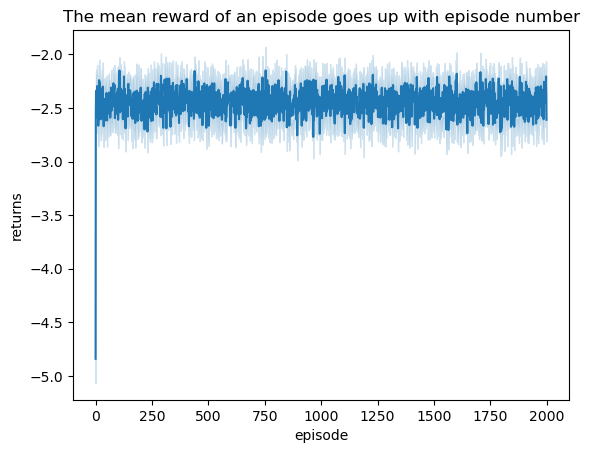

In [15]:
df2 = pd.DataFrame(behavior_rewards)
df2.columns.name = 'episode'
df2.index.name = 'learner'
df2 = df2.stack().rename('returns').to_frame()


df3 = pd.DataFrame(target_rewards)
df3.columns.name = 'episode'
df3.index.name = 'learner'
df3 = df3.stack().rename('returns').to_frame()

sns.lineplot( data=df2, x='episode', y='returns');
plt.title('The mean reward of an episode goes up with episode number')
plt.show()

However, learning seems to end here, as reward remains fairly constant from then on. Moreover, the mean step length (number of turns it takes to complete an episode) remains comstant, indicating that the model never wins a game. This is most likely because the state space lacks the information that the agent needs - the agent doesn't know what tiles are in its hand, meaning it cannot learn how to play the game.

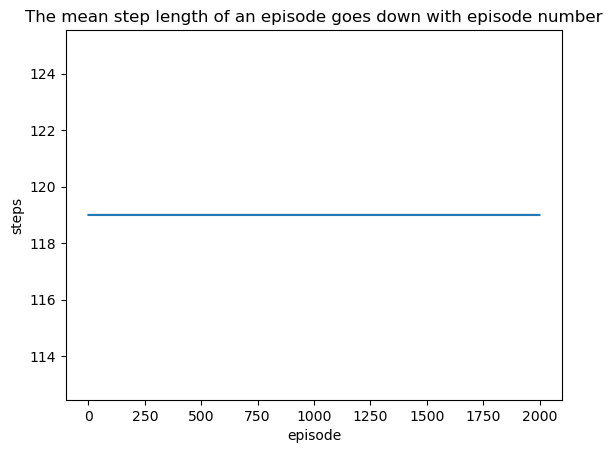

In [14]:
df1 = pd.DataFrame(steps)
df1.columns.name = 'episode'
df1.index.name = 'learner'
df1 = df1.stack().rename('steps').to_frame()

sns.lineplot( data=df1, x='episode', y='steps');
plt.title('The mean step length of an episode goes down with episode number')
plt.show()

## Reward Prediction

Obviously, this didn't work

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.


### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   


### Future work
Looking at the limitations and/or the toughest parts of the problem and/or the situations where the algorithm(s) did the worst... is there something you'd like to try to make these better.

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

### Interpretation of Results

### Limitations
Our biggest issue was planning and coordination. We tried to do too much, and jumped ahead too fast, which resulted in different teams working on separate implementations of the same thing - for example, we had at least three different state representations and at least two different neural networks, and created a new file every time we wanted to test one of them. This also resulted in us having difficulty implementing textbook Monte Carlo algorithms, which should not have been nearly as difficult as they were, and wouldn't have been if we'd had multiple pairs of eyes looking at them from the start.  
  
Beyond this, a lot of our issues  stemmed from computational limitations. Early attempts to get Monte Carlo training loops to work failed in part because we lacked the time to let them run a couple dozen rounds, much less a couple hundred. These limits were exacerbated by our poor time management and by inefficient code - the initial implementation of our state space required moving objects to and from variable-length lists multiple times per turn, which has not been entirely phased out even in our most experimental version of the game environment, as well as creating new tensors frequently (something that PyTorch warns against because it incurs a significant computational overhead). But even without these inefficiencies, there was only so much we could do running Monte Carlo simulations on the CPU of a personal computer.

### Future work
The biggest struggles with our work was optimizing our environment, efficiently simulating agents, and applying textbook Monte Carlo algorithms for optimization. Some steps we would have liked to try is reducing the state space from the 10^48 possible states to total possible melds or simply tiles to reduce the computational cost for both Monte Carlo and reward prediction algorithms. We additionally should have better utilized the strategy of tile encoding with 4 channels to properly calculate probabilities of a win given the current hand of the AI.

In terms of different strategies, instead of relying on simulations, we could have scraped state-action pair data from top mahjong players online or via the World Mahjong Championship records to utilize supervised learning, or focus more on run-time policy adapatation to improve optimization mid-game rather than a general strategy for training. The main roadblock for the Mahjong AI algorithm project is the computational effiency of a CPU as well as insufficient simulation time after changing strategies too far into the project. However, it is definitely possible to make use of these strategies to shorten runtime as well as greatly improve an AI agent for Shanghai mahjong based on previous precedent of Microsoft's Suphyx.<a name="li"></a>[<sup>[3]</sup>](#linote)

### Ethics & Privacy

There are two potential ethical concerns with this project. One is that if it works well enough, it could be used to cheat in high-stakes games; the other is that someone could find a way of using part of our code to do something different. Neither of these are particularly concerning - people put a lot of effort into preventing people from cheating in high-stakes gambling, and the program we’re trying to make is similar enough to other existing programs that we’re unlikely to find anything particularly new that isn’t specific to this kind of game. If we were planning on deploying it (commercially or for free), we’d also have to worry about ensuring equal access for anyone who wants it.


### Conclusion

# Footnotes
<a name="langnote"></a>1.[^](#lang) Lang, C. (2021, May 4). What the surprising history of Mah-jongg can teach us about America. TIME. https://time.com/6045817/mahjongg-history/

<a name="euophrysnote"></a>2.[^](#euophrys) Euophrys. (n.d.). GitHub - Euophrys/Riichi-Trainer: A Riichi Mahjong trainer. GitHub. https://github.com/Euophrys/Riichi-Trainer

<a name="linote"></a>3.[^](#li) Li, J., Koyamada, S., Ye, Q., Liu, G., Wang, C., Yang, R., Zhao, L., Qin, T., Liu, T., & Hon, H. (2021, January 25). Suphx: Mastering Mahjong with Deep Reinforcement Learning - Microsoft Research. Microsoft Research. https://www.microsoft.com/en-us/research/publication/suphx-mastering-mahjong-with-deep-reinforcement-learning/

<a name="koyamadanote"></a>2.[^](#koyamada) Koyamada, S., Habara, K., Goto, N., Okano, S., Nishimori, S., & Ishii, S. (n.d.). Mjx: A framework for Mahjong AI research. 2021 IEEE Conference on Games (CoG), 504–507. https://doi.org/10.1109/cog51982.2022.9893712